Importing the Essential Libraries and loading data :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

df = pd.read_csv('Iris.csv', index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Now, we check the data set information :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Check the missing values :

In [4]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Visualisations :

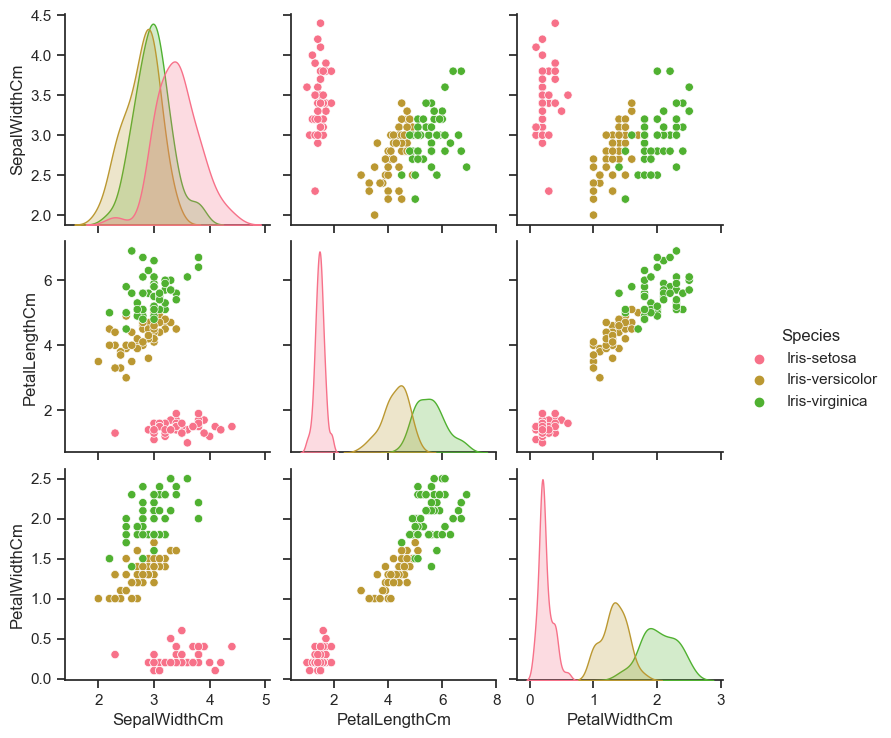

In [6]:
import seaborn as sns
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df.iloc[:,1:6],hue="Species")

Prepraring data for prediction :

In [7]:
y = df['Species']
X = df.drop(['Species'], axis = 1)

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
Y = encoder.fit_transform(y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42) 

Modelisation : Dense Neural Netowrk

In [9]:
inputs = Input(shape = 4, name = "Input")


dense1 = Dense(units = 10, activation = "tanh", name = "Dense_1")
dense2 = Dense(units = 8, activation = "tanh", name = "Dense_2")
dense3 = Dense(units = 6, activation = "tanh", name = "Dense_3")
dense4 = Dense(units = 3, activation = "softmax", name = "Dense_4")

In [10]:
x=dense1(inputs)
x=dense2(x)
x=dense3(x)
outputs=dense4(x)

In [11]:
model = Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 4)]               0         
                                                                 
 Dense_1 (Dense)             (None, 10)                50        
                                                                 
 Dense_2 (Dense)             (None, 8)                 88        
                                                                 
 Dense_3 (Dense)             (None, 6)                 54        
                                                                 
 Dense_4 (Dense)             (None, 3)                 21        
                                                                 
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [13]:
model.fit(X_train,y_train,epochs=100,batch_size=32, validation_split=0.1)

Epoch 1/100
3/3 [==============================] - 1s 114ms/step - loss: 1.1683 - accuracy: 0.3085 - val_loss: 1.2472 - val_accuracy: 0.1818
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 1.1467 - accuracy: 0.3085 - val_loss: 1.2264 - val_accuracy: 0.1818
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 1.1280 - accuracy: 0.3085 - val_loss: 1.2066 - val_accuracy: 0.1818
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 1.1102 - accuracy: 0.3298 - val_loss: 1.1872 - val_accuracy: 0.1818
Epoch 5/100
3/3 [==============================] - 0s 39ms/step - loss: 1.0928 - accuracy: 0.3404 - val_loss: 1.1683 - val_accuracy: 0.1818
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0768 - accuracy: 0.4149 - val_loss: 1.1488 - val_accuracy: 0.1818
Epoch 7/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0603 - accuracy: 0.4787 - val_loss: 1.1292 - val_accuracy: 0.2727
Epoch 8/100
3/3 [==

In [14]:
test_pred = model.predict(X_test)
y_test_class = y_test
y_pred_class = np.argmax(test_pred,axis=1)

2/2 [==============================] - 0s 0s/step


In [15]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
